**Introduction to KNN: Credit Card Fraud Detection**

**1. Data Exploration & Understanding**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fraudTrain.csv')
print("First five rows of the dataset:")
df.head()




First five rows of the dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
print("Structure of the dataset:")
df.info()


Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31151 entries, 0 to 31150
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31151 non-null  int64  
 1   trans_date_trans_time  31151 non-null  object 
 2   cc_num                 31151 non-null  int64  
 3   merchant               31151 non-null  object 
 4   category               31151 non-null  object 
 5   amt                    31151 non-null  float64
 6   first                  31151 non-null  object 
 7   last                   31151 non-null  object 
 8   gender                 31151 non-null  object 
 9   street                 31151 non-null  object 
 10  city                   31150 non-null  object 
 11  state                  31150 non-null  object 
 12  zip                    31150 non-null  float64
 13  lat                    31150 non-null  float64
 14  long                   31150

In [5]:
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,31151.000000,3.115100e+04,31151.000000,31150.000000,31150.000000,31150.000000,3.115000e+04,3.115000e+04,31150.000000,31150.000000,31150.000000
mean,15575.000000,4.160516e+17,71.972223,48741.012970,38.536202,-90.245248,8.905872e+04,1.326173e+09,38.536572,-90.247639,0.009920
std,8992.663454,1.307937e+18,148.381965,26996.933234,5.096907,13.920543,2.976224e+05,4.540190e+05,5.126436,13.937947,0.099104
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,7787.500000,1.800429e+14,9.710000,25526.000000,34.668900,-96.809400,7.440000e+02,1.325814e+09,34.781559,-96.972432,0.000000
50%,15575.000000,3.519233e+15,48.090000,48088.000000,39.342600,-87.461600,2.471000e+03,1.326153e+09,39.345150,-87.424560,0.000000
75%,23362.500000,4.642255e+15,83.870000,72042.000000,41.846700,-80.128400,2.047800e+04,1.326564e+09,41.919813,-80.167952,0.000000
max,31150.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326991e+09,66.659242,-66.967742,1.000000


In [6]:
print("Missing values in the dataset:")
df.isnull().sum()

Missing values in the dataset:


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [7]:
print("Unique values in the dataset:")
df.nunique()


Unique values in the dataset:


,0
Unnamed: 0,31151
trans_date_trans_time,30794
cc_num,909
merchant,693
category,14
amt,13176
first,337
last,465
gender,2
street,909


In [8]:
print("Number of rows and columns in the dataset:")
df.shape


Number of rows and columns in the dataset:


(31151, 23)

In [9]:
print("Data types of columns in the dataset:")
df.dtypes


Data types of columns in the dataset:


,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


**2. Data Preprocessing**

**2.1 Handling Missing Values**

In [10]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#handling missing values
print('Checking for missing values:')
print(df.isnull().sum())

Checking for missing values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [11]:
import pandas as pd

# Assuming df is your DataFrame

# Check for NaN values in 'is_fraud' column
print("Checking for NaN values in 'is_fraud' column:")
print(df['is_fraud'].isna().sum())

# Handle NaN values in 'is_fraud' column (choose an appropriate value, e.g., 0 or 1)
# Here we assume 0 (non-fraud) for missing values
df['is_fraud'].fillna(0, inplace=True)
df['is_fraud'] = df['is_fraud'].astype(int)

# Similarly, handle NaN values for 'zip' and 'unix_time' if they exist
df['zip'].fillna(0, inplace=True)
df['zip'] = df['zip'].astype(int)

df['unix_time'].fillna(0, inplace=True)
df['unix_time'] = df['unix_time'].astype(int)

# Convert 'trans_date_trans_time' to datetime, specify format and handle errors
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Verify the changes
print(df.dtypes)


Checking for NaN values in 'is_fraud' column:
1
Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                        float64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object


In [12]:
# Convert transaction date and time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract features from datetime
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

# Convert date of birth to datetime
df['dob'] = pd.to_datetime(df['dob'])

# Calculate age of the cardholder
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365


In [13]:
# Drop columns that are not useful
df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'dob'])


In [14]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['merchant', 'category', 'gender', 'job']

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [15]:
# Separate features and target variable
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']


In [16]:
from sklearn.preprocessing import LabelEncoder

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Handle missing values
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
for col in non_numeric_cols:
    X[col] = X[col].fillna('unknown')

# Convert non-numeric columns to numeric
for col in non_numeric_cols:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
print(df.dtypes)


cc_num                 int64
merchant               int64
category               int64
amt                  float64
first                  int64
last                   int64
gender                 int64
street                 int64
city                   int64
state                  int64
zip                    int64
lat                  float64
long                 float64
city_pop             float64
job                    int64
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
trans_hour             int32
trans_day_of_week      int32
age                  float64
dtype: object


In [18]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df.dtypes)


cc_num                 int64
merchant               int64
category               int64
amt                  float64
first                  int64
last                   int64
gender                 int64
street                 int64
city                   int64
state                  int64
zip                    int64
lat                  float64
long                 float64
city_pop             float64
job                    int64
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
trans_hour             int32
trans_day_of_week      int32
age                  float64
dtype: object


**2.2 Handling Outliers**

In [19]:
from scipy import stats
import numpy as np

# List of numeric columns to check for outliers
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Define threshold for outlier detection
threshold = 3

for col in numeric_cols:
    # Calculate Z-scores
    z_scores = stats.zscore(df[col])

    # Identify outliers
    outliers = abs(z_scores) > threshold
    print(f'Number of outliers in {col}: {sum(outliers)}')

    # Calculate statistics for capping
    mean = df[col].mean()
    std = df[col].std()
    upper_limit = mean + threshold * std
    lower_limit = mean - threshold * std

    # Cap the outliers using .loc[]
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit

# Verify the changes
print(df.describe())


Number of outliers in amt: 410
Number of outliers in lat: 0
Number of outliers in long: 0
Number of outliers in city_pop: 0
Number of outliers in merch_lat: 0
Number of outliers in merch_long: 0
             cc_num      merchant      category           amt         first  \
count  3.115100e+04  31151.000000  31151.000000  31151.000000  31151.000000   
mean   4.160516e+17    343.232545      6.214054     -0.038251    170.098135   
std    1.307937e+18    200.263803      3.912751      0.563769     94.160438   
min    6.041621e+10      0.000000      0.000000     -0.478315      0.000000   
25%    1.800429e+14    166.000000      3.000000     -0.419614     85.000000   
50%    3.519233e+15    348.000000      6.000000     -0.160954    171.000000   
75%    4.642255e+15    512.000000     10.000000      0.080185    244.000000   
max    4.992346e+18    692.000000     13.000000      3.000048    336.000000   

               last        gender        street          city         state  \
count  31151.0

In [20]:
# List of numeric columns to check for outliers
numeric_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Print the number of outliers after capping
    outliers_after_capping = (df[col] < lower_bound) | (df[col] > upper_bound)
    print(f'Number of outliers in {col} after capping: {sum(outliers_after_capping)}')


Number of outliers in amt after capping: 0
Number of outliers in lat after capping: 0
Number of outliers in long after capping: 0
Number of outliers in city_pop after capping: 0
Number of outliers in merch_lat after capping: 0
Number of outliers in merch_long after capping: 0


In [21]:
# Identify the index of missing value in the target variable
missing_indices = df[df['is_fraud'].isna()].index
print("Indices with missing values in target variable:", missing_indices)

# Drop the row with the missing target value
df_cleaned = df.drop(index=missing_indices)


Indices with missing values in target variable: Index([], dtype='int64')


In [22]:

# Separate features and target variable from the cleaned DataFrame
X_cleaned = df_cleaned.drop(columns=['is_fraud'])
y_cleaned = df_cleaned['is_fraud']

from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_cols = X_cleaned.select_dtypes(include=['object', 'datetime']).columns

# Convert non-numeric columns to numeric
for col in non_numeric_cols:
    if X_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        X_cleaned[col] = le.fit_transform(X_cleaned[col])
    else:
        X_cleaned[col] = X_cleaned[col].astype('int64')  # or another appropriate type


**2.3 Handling Data Imbalances**

In [23]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Ensure that X_cleaned is a DataFrame to use dropna
# Handle missing values before converting to NumPy array
X_cleaned = df_cleaned.drop(columns=['is_fraud'])
y_cleaned = df_cleaned['is_fraud']

# Convert non-numeric columns to numeric
non_numeric_cols = X_cleaned.select_dtypes(include=['object', 'datetime']).columns
for col in non_numeric_cols:
    if X_cleaned[col].dtype == 'object':
        le = LabelEncoder()
        X_cleaned[col] = le.fit_transform(X_cleaned[col])
    else:
        X_cleaned[col] = X_cleaned[col].astype('int64')

# Handle missing values in the DataFrame
imputer = SimpleImputer(strategy='median')
X_cleaned = imputer.fit_transform(X_cleaned)

# Convert back to DataFrame if needed for alignment with y_cleaned
X_cleaned = pd.DataFrame(X_cleaned, columns=df_cleaned.drop(columns=['is_fraud']).columns)

# Drop rows with missing values after imputation (if necessary)
X_cleaned.dropna(inplace=True)
y_cleaned = y_cleaned[X_cleaned.index]  # Align y_cleaned with X_cleaned

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

# Check the balance after resampling
print(f'Original dataset shape: {y_cleaned.value_counts()}')
print(f'Resampled dataset shape: {pd.Series(y_resampled).value_counts()}')


Original dataset shape: is_fraud
0    30842
1      309
Name: count, dtype: int64
Resampled dataset shape: is_fraud
0    30842
1    30842
Name: count, dtype: int64


**3. Feature Selection**

In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Initialize the imputer for numerical columns (using median here)
num_imputer = SimpleImputer(strategy='median')

# List of numerical columns with missing values
num_cols = ['cc_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'trans_hour', 'trans_day_of_week', 'age']

# Apply the imputer to numerical columns
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# For categorical columns (if there were any), you could use SimpleImputer with strategy='most_frequent'
# Example:
# cat_imputer = SimpleImputer(strategy='most_frequent')
# cat_cols = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']
# df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Verify that there are no more missing values
print(df.isna().sum())


cc_num               0
merchant             0
category             0
amt                  0
first                0
last                 0
gender               0
street               0
city                 0
state                0
zip                  0
lat                  0
long                 0
city_pop             0
job                  0
trans_num            1
unix_time            0
merch_lat            0
merch_long           0
is_fraud             0
trans_hour           0
trans_day_of_week    0
age                  0
dtype: int64


**4. Model Implementation**

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Assuming 'df' is your original DataFrame and 'df_selected' is derived from it

# Create a DataFrame with only selected features
selected_features = ['amt', 'trans_hour', 'unix_time', 'age', 'merch_long', 'long', 'job', 'last', 'lat', 'merch_lat']
df_selected = df[selected_features]

# Separate features and target variable
X = df_selected
y = df['is_fraud']

# Optional: Use a smaller subset of the data for quicker testing
# X, y = X.sample(frac=0.5, random_state=42), y.sample(frac=0.5, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create a pipeline that combines scaling, SMOTE, and RandomForest
pipeline = Pipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('rf', rf)
])

# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'rf__n_estimators': [100, 150],  # Narrower options for n_estimators
    'rf__max_depth': [None, 10],  # Same depth options but can be reduced further
    'rf__min_samples_split': [2],  # Single option to speed up
    'rf__min_samples_leaf': [1]  # Single option to speed up
}

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, n_iter=5, cv=2, n_jobs=-1, random_state=42, scoring='roc_auc'
)

random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:\n", roc_auc_score(y_test, y_prob))
print("\nBest Parameters:\n", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Confusion Matrix:
 [[9226   27]
 [  25   68]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9253
           1       0.72      0.73      0.72        93

    accuracy                           0.99      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.99      0.99      0.99      9346


ROC-AUC Score:
 0.9852991590056814

Best Parameters:
 {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_depth': None}


**5. Fraud Detection**

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'best_model' is the trained pipeline with scaler and SMOTE

# Define the new input data
new_data = pd.DataFrame({
    'amt': [100.0, 200.0],
    'trans_hour': [12, 15],
    'unix_time': [1609459200, 1609545600],
    'age': [30, 45],
    'merch_long': [0.5, -1.2],
    'long': [0.4, -1.1],
    'job': [0, 1],
    'last': [5, 10],
    'lat': [0.6, -0.7],
    'merch_lat': [0.4, -0.5]
})

# Apply the same transformations using the pipeline
new_data_predictions = best_model.predict(new_data)
new_data_probs = best_model.predict_proba(new_data)[:, 1]  # Get probabilities for fraud class

# Display predictions
for i, pred in enumerate(new_data_predictions):
    result = 'Fraud' if pred == 1 else 'Not Fraud'
    print(f"Input {i+1}: {result}, Probability of Fraud: {new_data_probs[i]:.2f}")


Input 1: Not Fraud, Probability of Fraud: 0.02
Input 2: Not Fraud, Probability of Fraud: 0.03


**6. Results Visualization & Analysis**

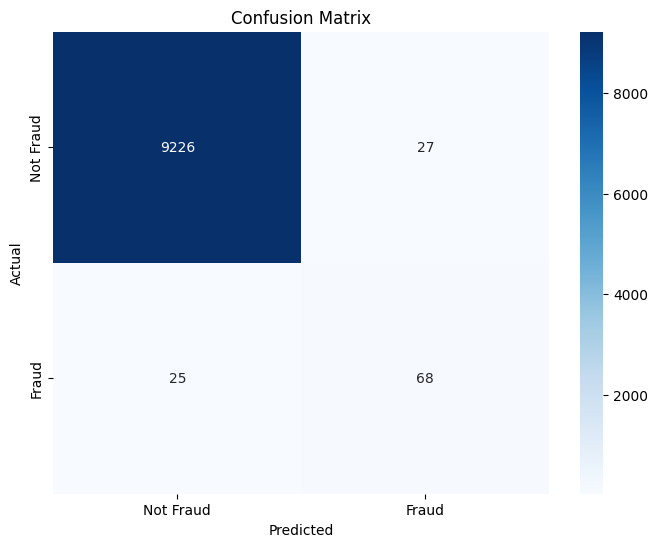

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


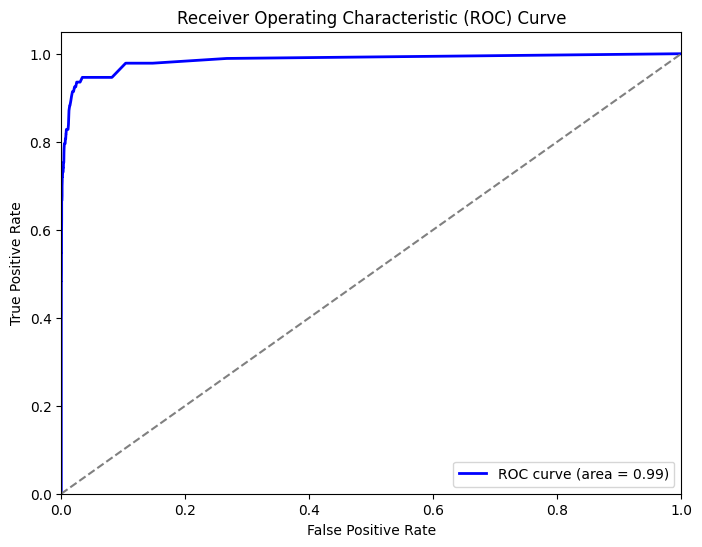

In [36]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


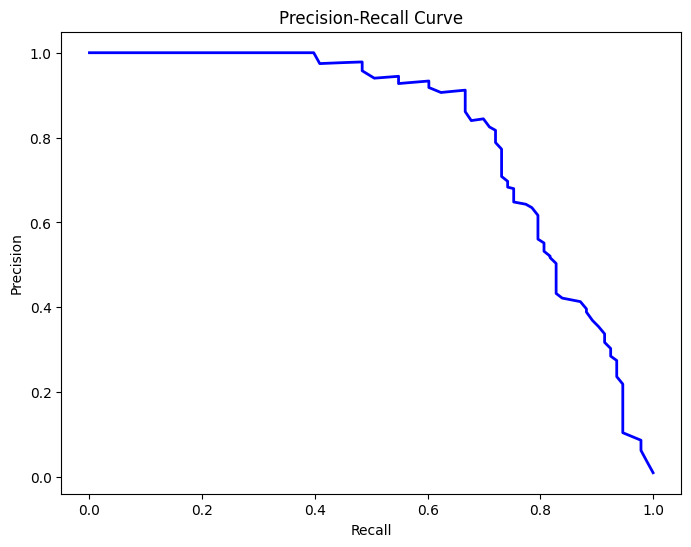

In [37]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


<ipython-input-38-aa6394e6a59b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


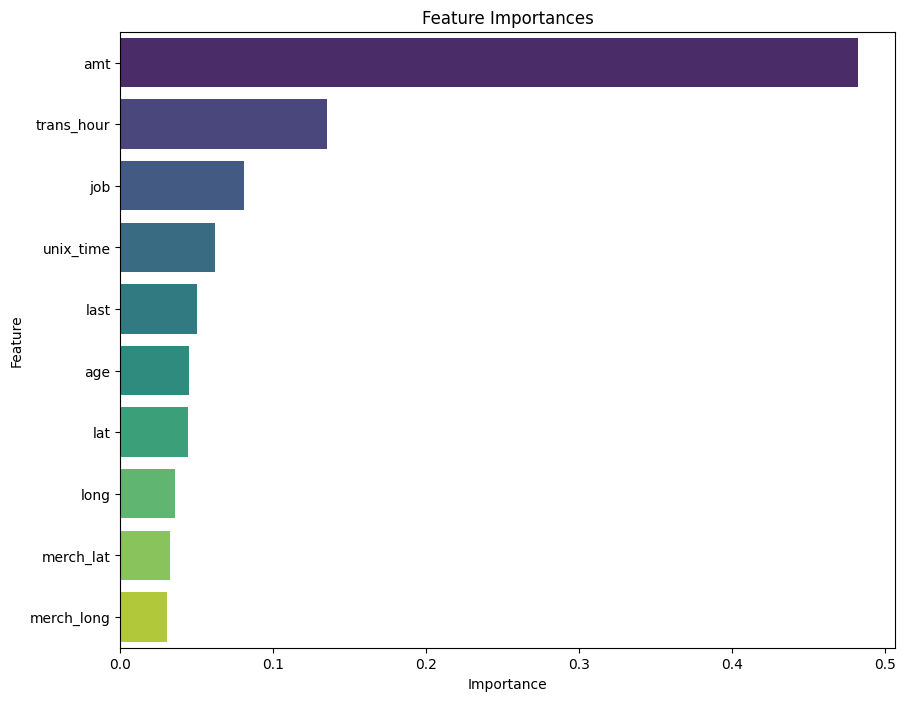

In [38]:
importances = best_model.named_steps['rf'].feature_importances_
feature_names = selected_features

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.show()


In [39]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])

# Print or save the report
print(report)




              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      9253
       Fraud       0.72      0.73      0.72        93

    accuracy                           0.99      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.99      0.99      0.99      9346

